In [1]:
%matplotlib widget

In [2]:
%load_ext autoreload

In [3]:
import numpy as np
import panel as pn
from IPython.display import display

In [4]:
pn.extension('tabulator')

In [5]:
from libertem.api import Context

from microscope_calibration.common.model import Parameters4DSTEM, DescanError, PixelYX
from microscope_calibration.ui import CoordinateCorrectionLayout
from microscope_calibration.util.diffraction import get_twothetas

In [6]:
acceleration_voltage_V = 300000

In [7]:
structure_filename = 'BiFeO3EntryWithCollCode29921.cif'

In [8]:
twothetas = get_twothetas(structure_filename, acceleration_voltage_V, reciprocal_radius=3)
twothetas

array([0.     , 0.00242, 0.00419, 0.00484, 0.00541, 0.00684, 0.00802,
       0.00838, 0.00967, 0.01054, 0.01081, 0.01185, 0.01256, 0.01368,
       0.0143 , 0.01451, 0.01529, 0.01586, 0.01604, 0.01675, 0.01727,
       0.01744, 0.01809, 0.01857, 0.01934, 0.01979, 0.01994, 0.02052,
       0.02094, 0.02108, 0.02163, 0.02203, 0.02216, 0.02268, 0.02307,
       0.02369, 0.02406, 0.02418, 0.02466, 0.02501, 0.02513, 0.02593,
       0.02604, 0.02649, 0.02682, 0.02736, 0.02768, 0.02778, 0.0282 ,
       0.02851, 0.02861, 0.02902, 0.02932, 0.02942])

In [9]:
#calib_filename = '/storage/er-c-data/adhoc/libertem/libertem-test-data/default.blo'
calib_filename = 'with_descan.npy'

In [10]:
#ctx = Context.make_with(cpus=8)
ctx = Context.make_with('inline')

In [11]:
ds = ctx.load('auto', calib_filename)

Column
    [0] Row
        [0] FloatInput(name='Scale bar / nm', step=0.01, value=np.float64(22400.0))
        [1] FloatInput(name='Camera length / m', step=0.01, value=1.0)
        [2] FloatInput(name='Convergence s..., step=0.01, value=1.0)
    [1] Row
        [0] Column(margin=(3, 3), max_width=400, sizing_mode='stretch_width')
            [0] Row(height=40, margin=(0, 0))
                [0] FloatPanel(config={'headerControls': {'maxim...}, contained=False, name='Image Controls', objects=[Row
    [0] Select(name='...], position='center', status='closed')
                [1] Row(height=40, margin=(0, 0))
                [2] Toggle(height=2, margin=(5, 5, 5, 5), name='Image Controls', sizing_mode='fixed', tags=['c8162b12-b3c6-4f33-bcf5-...], visible=False, width=2)
            [1] Bokeh(figure)
        [1] Column(margin=(3, 3), max_width=400, sizing_mode='stretch_width')
            [0] Row(height=40, margin=(0, 0))
                [0] FloatPanel(config={'headerControls': {'maxim...}, contained=False, name='Image Controls', objects=[Row
    [0] Select(name='...], position='center', status='closed')
                [1] Row(height=40, margin=(0, 0))
                [2] Toggle(height=2, margin=(5, 5, 5, 5), name='Image Controls', sizing_mode='fixed', tags=['e8b47b46-bb33-489a-b40c-...], visible=False, width=2)
            [1] Bokeh(figure)
    [2] Row
        [0] Column
            [0] Markdown(str)
            [1] Tabulator(buttons={'select': '<i class="fa f...}, selectable=False, value=Empty DataFrame
Columns: [...)
            [2] Row
                [0] Button(name='Record')
                [1] Button(name='Apply correction f...)
                [2] Button(name='Clear')
                [3] Button(name='Refine correction w...)
        [1] Column
            [0] Markdown(str)
            [1] Tabulator(buttons={'select': '<i class="fa f...}, selectable=False, value=Empty DataFrame
Columns: [...)
            [2] Row
                [0] Button(name='Record')
                [1] Button(name='Derive coordinate s...)
                [2] Button(name='Clear')
                [3] Button(name='Optimize sharpness o...)
    [3] Row
        [0] Column(margin=(3, 3), max_width=400, sizing_mode='stretch_width')
            [0] Row(height=40, margin=(0, 0))
                [0] FloatPanel(config={'headerControls': {'maxim...}, contained=False, name='Image Controls', objects=[Row
    [0] Select(name='...], position='center', status='closed')
                [1] Row(height=40, margin=(0, 0))
                [2] Toggle(height=2, margin=(5, 5, 5, 5), name='Image Controls', sizing_mode='fixed', tags=['b09b44c4-5f08-4308-81c7-...], visible=False, width=2)
            [1] Bokeh(figure)
        [1] Column(margin=(3, 3), max_width=400, sizing_mode='stretch_width')
            [0] Row(height=40, margin=(0, 0))
                [0] FloatPanel(config={'headerControls': {'maxim...}, contained=False, name='Image Controls', objects=[Row
    [0] Select(name='...], position='center', status='closed')
                [1] Row(height=40, margin=(0, 0))
                [2] Toggle(height=2, margin=(5, 5, 5, 5), name='Image Controls', sizing_mode='fixed', tags=['ed24fafc-506d-4bf3-ad7d-...], visible=False, width=2)
            [1] Bokeh(figure)
        [2] Column(margin=(3, 3), max_width=400, sizing_mode='stretch_width')
            [0] Row(height=40, margin=(0, 0))
                [0] FloatPanel(config={'headerControls': {'maxim...}, contained=False, name='Image Controls', objects=[Row
    [0] Select(name='...], position='center', status='closed')
                [1] Row(height=40, margin=(0, 0))
                [2] Toggle(height=2, margin=(5, 5, 5, 5), name='Image Controls', sizing_mode='fixed', tags=['20af5546-8e3b-472b-8b84-...], visible=False, width=2)
            [1] Bokeh(figure)
    [4] Row
        [0] Column(margin=(3, 3), max_width=400, sizing_mode='stretch_width')
            [0] Row(height=40, margin=(0, 0))
                [0] FloatPanel(config={'header
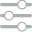
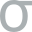
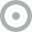
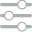
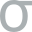
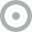
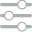
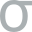
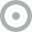
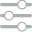
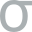
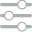
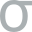
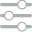
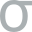
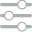
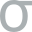

In [36]:
%autoreload
gui = CoordinateCorrectionLayout(
    dataset=ds,
    nav_mode='point',
    ctx=ctx,
#    twothetas=twothetas,
    # twothetas=np.array([0.,1.]),
    # twothetas=None,
)
display(gui.layout.servable())

In [13]:
gui.params

Parameters4DSTEM(overfocus=0.0, scan_pixel_pitch=1e-06, scan_center=PixelYX(y=16.0, x=16.0), scan_rotation=0.0, camera_length=1.0, detector_pixel_pitch=5e-05, detector_center=PixelYX(y=32.0, x=32.0), semiconv=0.001, flip_y=False, descan_error=DescanError(pxo_pxi=0.0, pxo_pyi=0.0, pyo_pxi=0.0, pyo_pyi=0.0, sxo_pxi=0.0, sxo_pyi=0.0, syo_pxi=0.0, syo_pyi=0.0, offpxi=0.0, offpyi=0.0, offsxi=0.0, offsyi=0.0), detector_rotation=0.0)

In [39]:
from typing import NamedTuple

import jax.numpy as jnp

In [41]:
class _CoordPointArgs(NamedTuple):
    params: Parameters4DSTEM
    # [(scan_y, scan_x, detector_y, detector_x) * n]
    points: jnp.array

In [ ]:
def _de_coords_point_loss(y, args: _DETiltPointArgs):
    
    opt_params = args.params.derive(
        descan_error=_tilt_descan(de=args.params.descan_error, y=y)
    )

    distances = []
    for (scan_y, scan_x, det_y, det_x) in args.points:
        res = trace(
            opt_params, scan_pos=PixelYX(y=scan_y, x=scan_x), source_dx=0., source_dy=0.)
        distances.extend((
            det_y - res['detector'].sampling['detector_px'].y,
            det_x - res['detector'].sampling['detector_px'].x,
        ))
    return jnp.array(distances)

In [46]:
isinstance(23, float | bool)

False